In [1]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


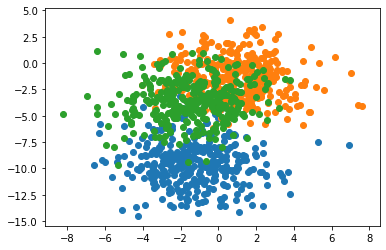

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

In [3]:
X

array([[  0.48719811,  -0.43160548],
       [ -1.48958879,  -3.47915742],
       [ -2.06250444,  -7.73300419],
       ...,
       [ -4.4839941 ,  -3.17623663],
       [ -1.92705839,   2.94801349],
       [ -2.32988529, -10.66109273]])

In [4]:
y

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,

Train: 0.792, Test: 0.826


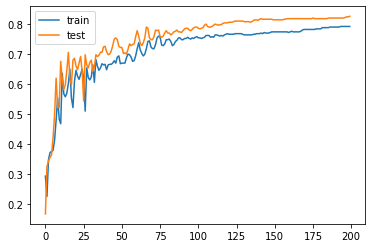

In [5]:
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history1 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.604, Test: 0.598


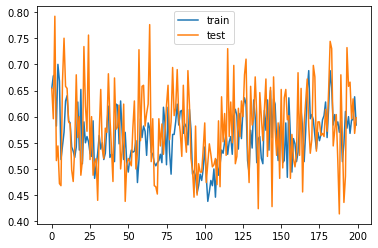

In [7]:
history2 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.790, Test: 0.790


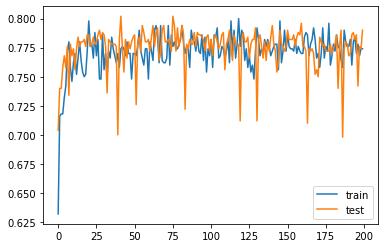

In [8]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history3 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history3.history['accuracy'], label='train')
pyplot.plot(history3.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.786, Test: 0.776


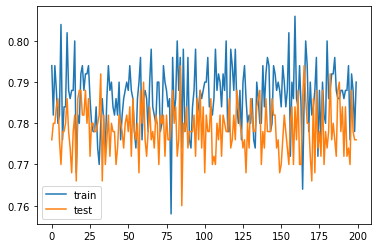

In [9]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history4 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history4.history['accuracy'], label='train')
pyplot.plot(history4.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

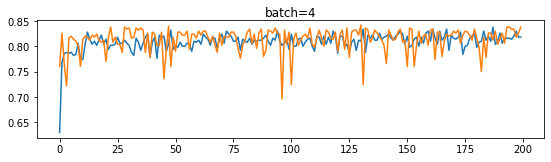

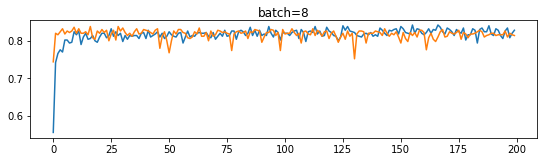

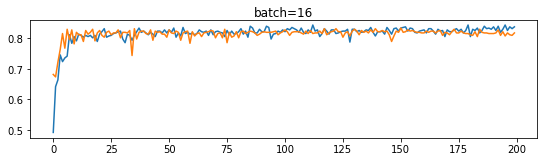

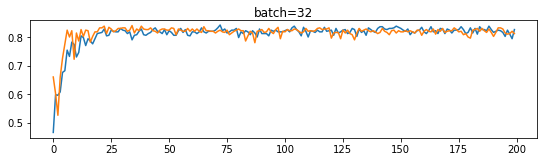

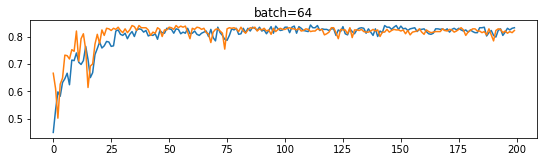

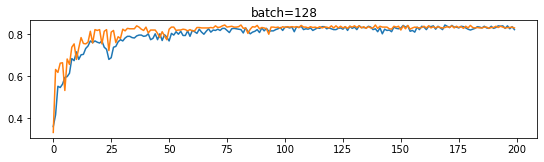

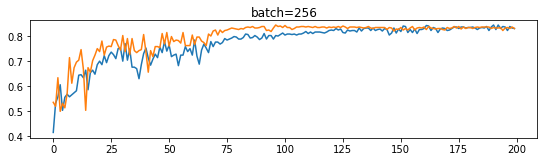

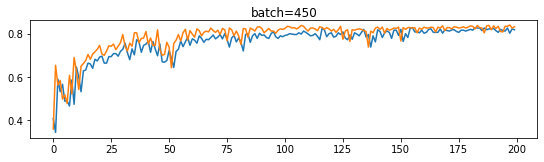

In [13]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('batch='+str(n_batch), pad=-40)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.figure(figsize=(20,10))
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves

pyplot.show()

The plots show that small batch results generally in rapid learning but a volatile learning process with higher variance in the classification accuracy. Larger batch sizes slow down the learning process but the final stages result in a convergence to a more stable model exemplified by lower variance in classification accuracy.